In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [99]:
data = pd.read_csv('Agriculture/data_season.csv')

In [101]:
data.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB


In [85]:
data = data.rename(columns={
    'yeilds': 'rendement', 
    'Crops': 'type_culture_plante'
})

In [11]:
data['Soil type'].unique()

array(['Alluvial', 'Red', 'Black', 'Loam', 'Sandy loam ', 'Red laterite',
       'Black cotton', 'Sandy', 'Laterite', 'Teelah', 'Clay', 'Clay loam',
       'Arid and Desert', 'loamy sand', 'River basins', 'Light sandy',
       'Heavy clay', 'Dry sandy ', 'Heavy cotton', 'Sandy loam',
       'Sandy clay loam', 'Well drained', 'Drained loam', 'Red ',
       'Gravelly sand', 'Medium textured clay', 'Medium textured ', nan],
      dtype=object)

In [13]:
data['Soil type'].describe()

count         3100
unique          27
top       Alluvial
freq           459
Name: Soil type, dtype: object

In [15]:
data['Soil type'].mode()

0    Alluvial
Name: Soil type, dtype: object

In [17]:
data['Soil type'].isna().sum()

58

In [19]:
data['Soil type'] = data['Soil type'].fillna(data['Soil type'].mode()[0])

In [23]:
data['type_culture_plante'].unique()

array(['Coconut', 'Cocoa', 'Coffee', 'Cardamum', 'Pepper', 'Arecanut',
       'Ginger', 'Tea', 'Paddy', 'Groundnut', 'Blackgram', 'Cashew',
       'Cotton'], dtype=object)

In [25]:
data['Year'].unique()

array([2004, 2013, 2014, 2015, 2016, 2017, 2018, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2019], dtype=int64)

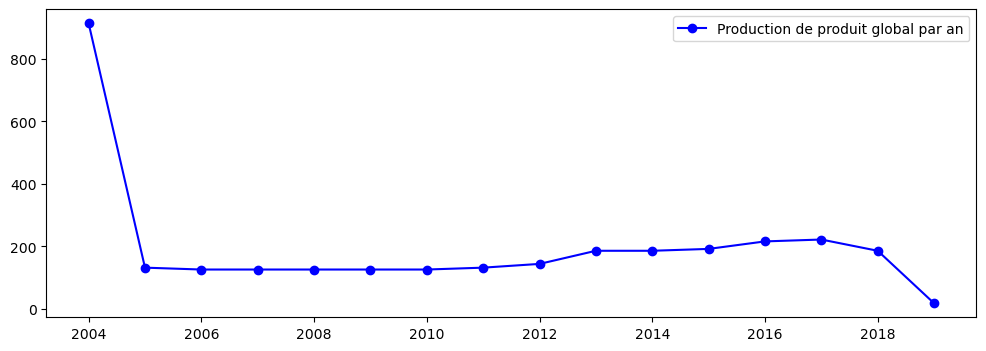

In [95]:
data_grouped = data.groupby(['Year']).count().reset_index()
plt.figure(figsize=(12,4))
plt.plot(data_grouped['Year'], data_grouped['Location'], color='blue', marker='o', label='Production de produit global par an')
plt.legend()
plt.show()

In [35]:
data.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,rendement,Humidity,type_culture_plante,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [37]:
def show_barplot_sum(df, base_col, columns, col_to_sum):
    for col in columns:
        # colors = ['red','green','blue','orange','yellow','pink','lightblue']
        data_grouped_on_based_col = df.groupby([base_col, col])[col_to_sum].sum().reset_index()
        plt.figure(figsize=(10,5))
        sns.barplot(data=data_grouped_on_based_col, x=base_col, hue=col, y=col_to_sum)
        # Désactive la notation scientifique sur l’axe y
        plt.ticklabel_format(style='plain', axis='y')
        plt.title('Somme de '+col_to_sum+' par '+base_col+' et par ' +col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

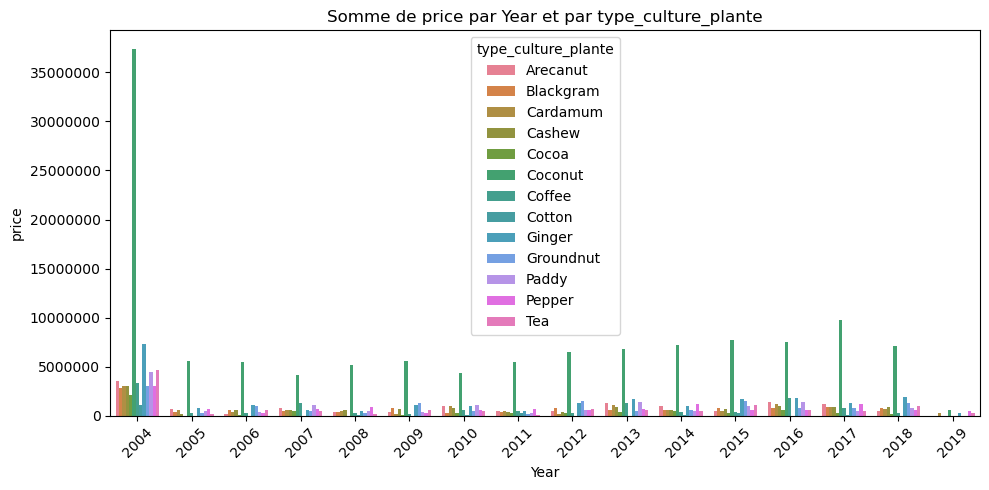

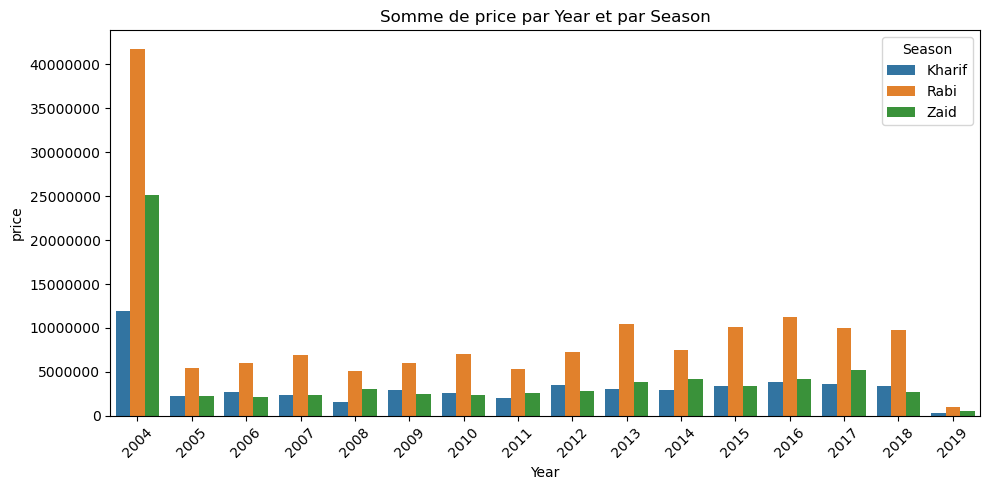

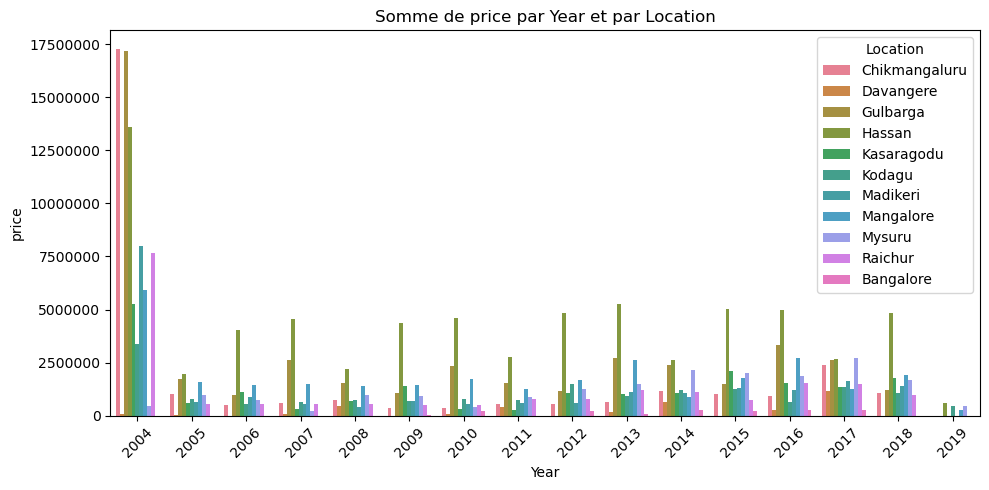

In [39]:
show_barplot_sum(data, 'Year', ['type_culture_plante', 'Season', 'Location'], 'price')

In [115]:
data.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,rendement,Humidity,type_culture_plante,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [123]:
def show_barplot_count(df, base_col, columns, col_to_count):
    for col in columns:
        # colors = ['red','green','blue','orange','yellow','pink','lightblue']
        data_grouped_on_based_col = df.groupby([base_col, col])[col_to_count].count().reset_index()
        plt.figure(figsize=(10,5))
        sns.barplot(data=data_grouped_on_based_col, x=base_col, hue=col, y=col_to_count)
        # Désactive la notation scientifique sur l’axe y
        plt.ticklabel_format(style='plain', axis='y')
        plt.title('Rendement de '+col_to_count+' par '+base_col+' et par ' +col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

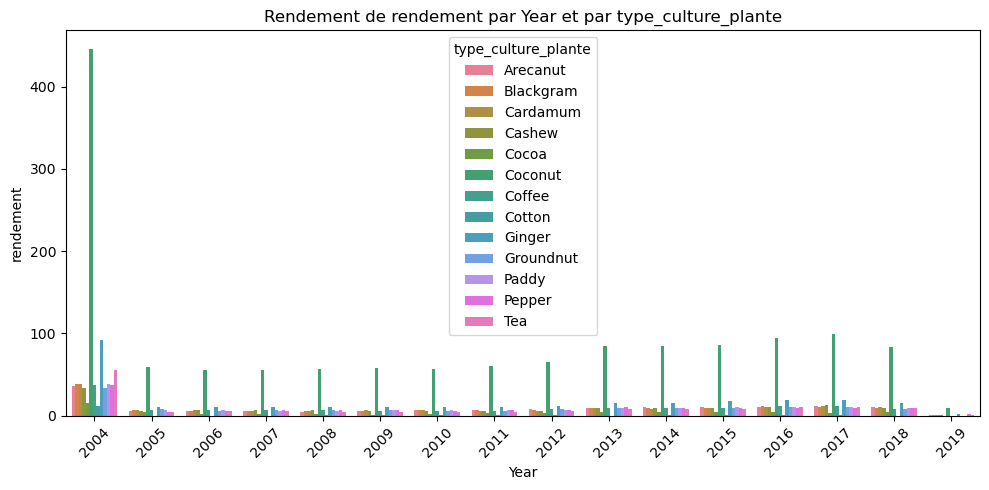

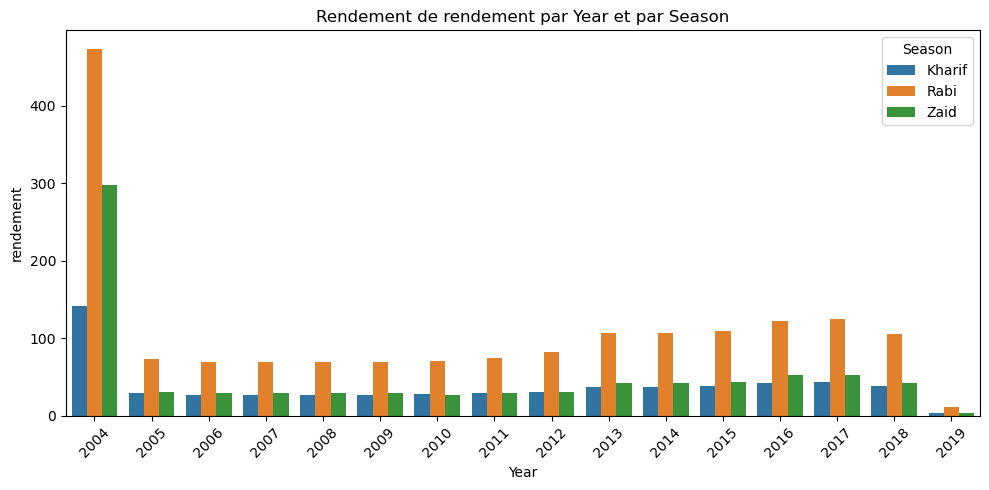

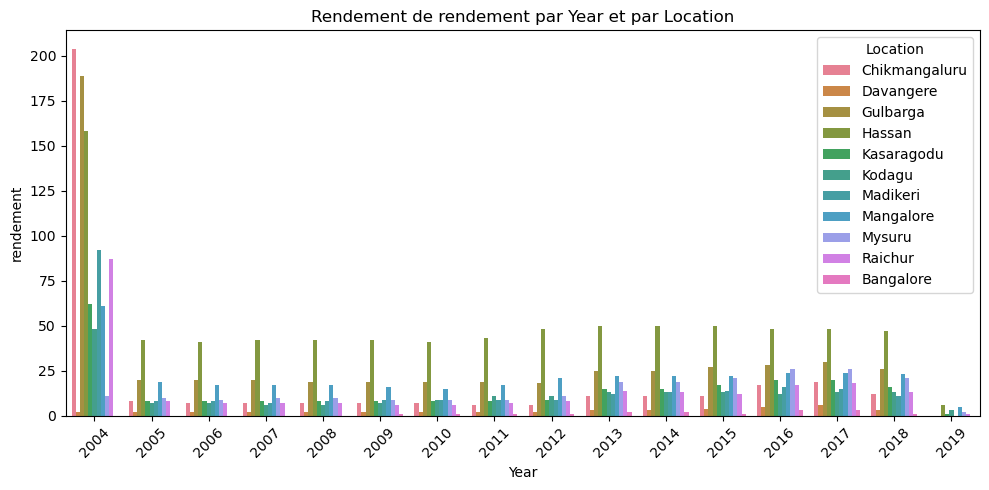

In [125]:
show_barplot_count(data, 'Year', ['type_culture_plante', 'Season', 'Location'], 'rendement')

In [127]:
data.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,rendement,Humidity,type_culture_plante,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


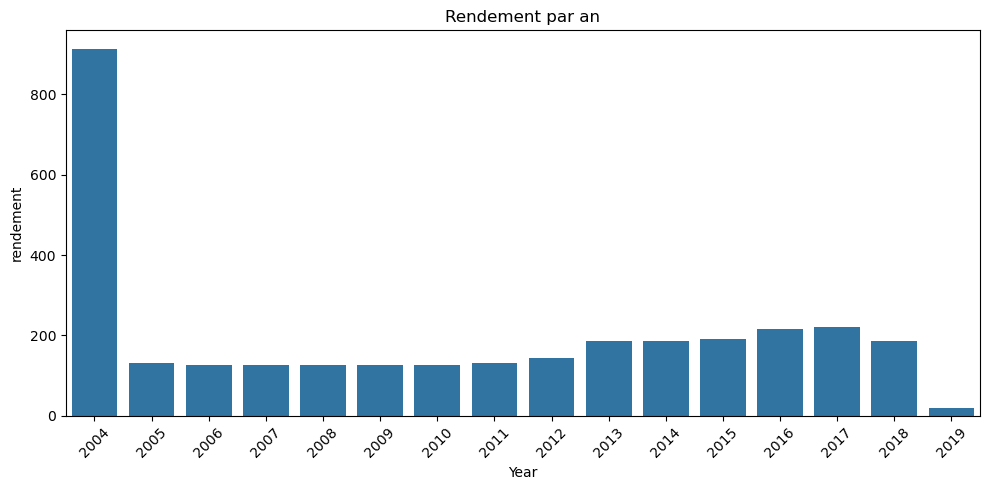

In [135]:
data_grouped_year_rendement = data.groupby(['Year'])['rendement'].count().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=data_grouped_year_rendement, x='Year', y='rendement')
# Désactive la notation scientifique sur l’axe y
plt.ticklabel_format(style='plain', axis='y')
plt.title('Rendement par an')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [137]:
data.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,rendement,Humidity,type_culture_plante,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [143]:
def show_piechart(df, col_to_grouped, type, col_operate):
    data_grouped = df.groupby([col_to_grouped])[col_operate].sum().reset_index() if type == 's' else df.groupby([col_to_grouped])[col_operate].count().reset_index()
    plt.pie(data_grouped[col_operate], labels = data_grouped[col_to_grouped], startangle = 90, autopct='%1.1f%%')
    plt.show()

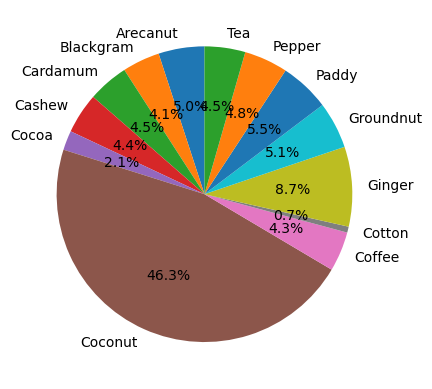

In [145]:
show_piechart(data, 'type_culture_plante', 's', 'price')

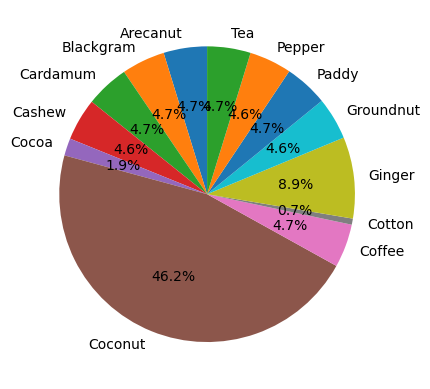

In [147]:
show_piechart(data, 'type_culture_plante', 'c', 'rendement')

In [41]:
data_evaluate = data.copy()

In [43]:
data_evaluate.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,rendement,Humidity,type_culture_plante,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [157]:
data_evaluate['Soil type'].unique()

array(['Alluvial', 'Red', 'Black', 'Loam', 'Sandy loam ', 'Red laterite',
       'Black cotton', 'Sandy', 'Laterite', 'Teelah', 'Clay', 'Clay loam',
       'Arid and Desert', 'loamy sand', 'River basins', 'Light sandy',
       'Heavy clay', 'Dry sandy ', 'Heavy cotton', 'Sandy loam',
       'Sandy clay loam', 'Well drained', 'Drained loam', 'Red ',
       'Gravelly sand', 'Medium textured clay', 'Medium textured '],
      dtype=object)

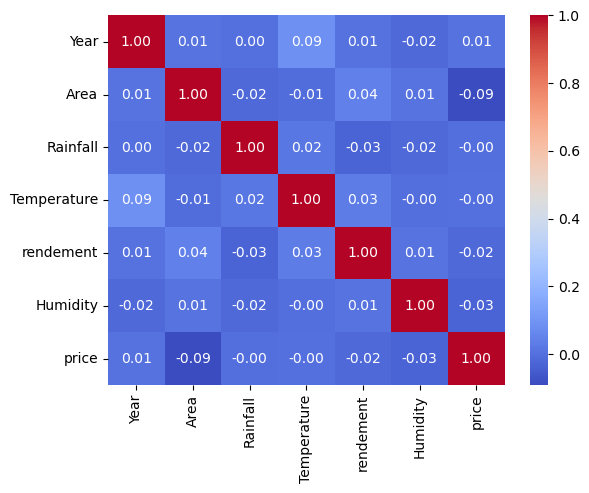

In [45]:
sns.heatmap(data_evaluate.corr(numeric_only=True), annot=True, cmap='coolwarm' , fmt='.2f')
plt.show()

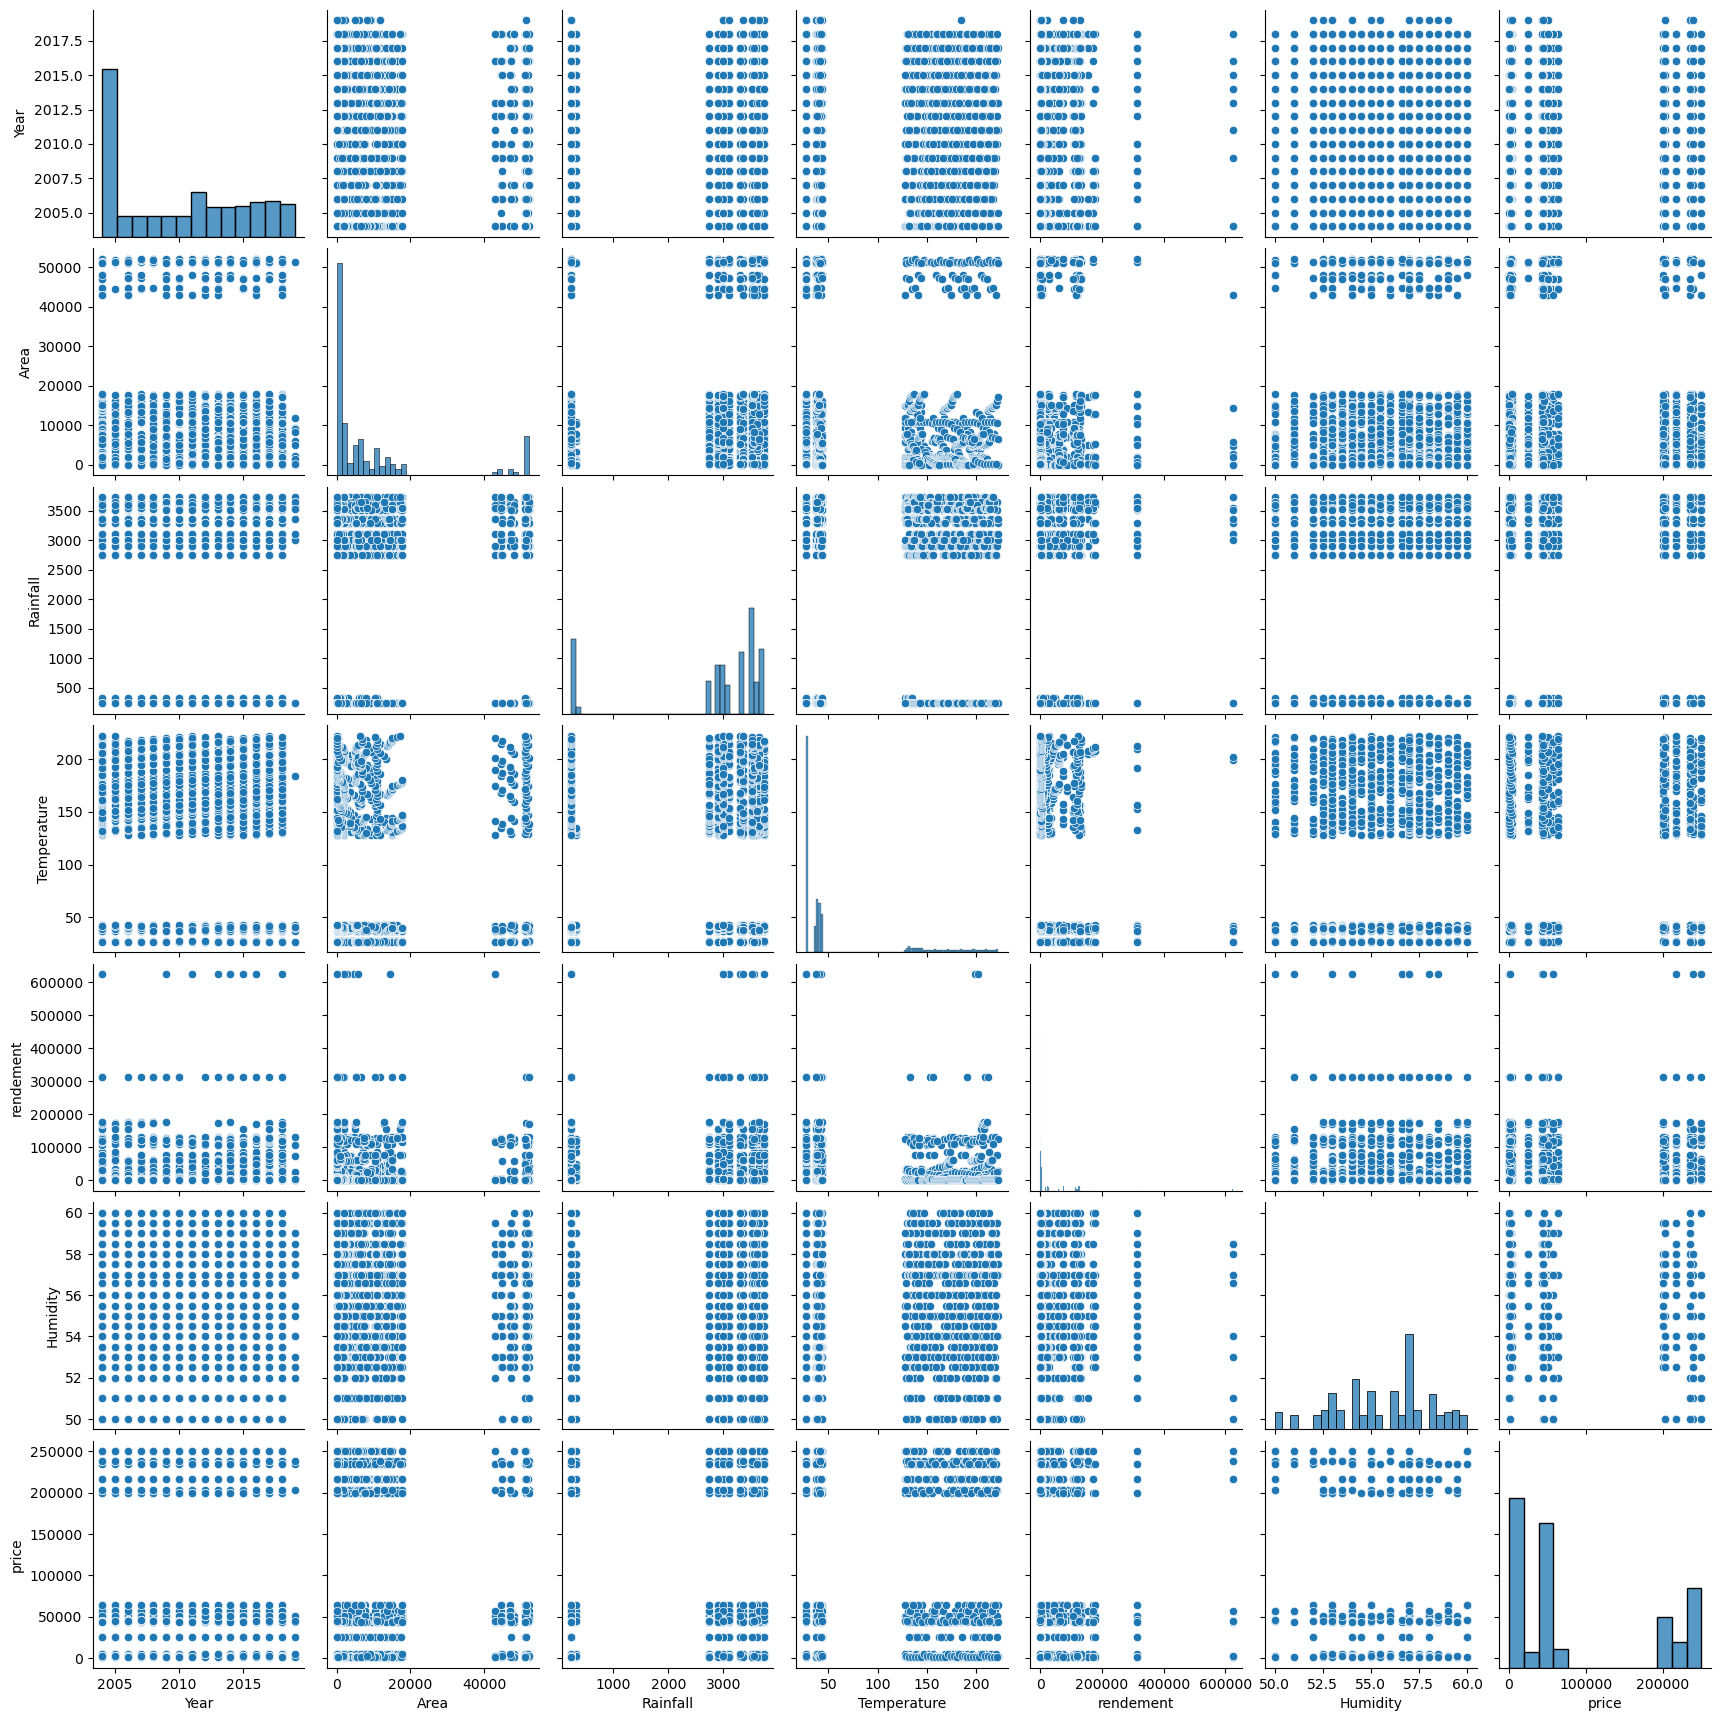

In [47]:
sns.pairplot(data_evaluate)
plt.show()

In [165]:
# ON VA UTILISER LE MODELE LINEAR REGRESSION MULTIVARIATE

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [61]:
X = data_evaluate[['Area', 'Rainfall', 'Temperature', 'Humidity',
                   'Soil type', 'Irrigation', 'Season', 'Location', 'price']]

In [63]:
Y = data_evaluate['rendement']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Vu qu'il n'y a pas de correlation linéaire entre toutes ces variables par rapport à notre target rendement, on va utiliser un modèle non linéaire et puissant pour predire le rendement

In [203]:
#On va testet le Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [205]:
#On va évaluer les résultats:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

MSE: 3716782412.422627
R² score: -0.10506389551228734


# D'après ce résultat, notre modèle RandomForestRegressor est tellement pire pour la prediction, on trouve un autre modèle

In [207]:
# Gradient Boosting Regressor (ou XGBoost / LightGBM)
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [209]:
#On va évaluer les résultats:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

MSE: 3508696805.7818108
R² score: -0.04319643447771582


# Toujours pire, il faut toujours trouver une autre Et surtout, on refait un EDA profond pour trouver les anomalies de nos données